# Домашнее задание №1:



## Данные для опции 2

#### Данные: Выбрать сообщество ВК , в котором >500 постов (и это не только картинки), и скачать данные по постам за период 25.01.2024 - 25.05.2024
#### Необходимо собрать:
* Дата поста
* Текст поста
* Кол-во лайков
* Кол-во просмотров
* Кол-во репостов




# Требования к отправке:
* Название: TextMining2024_группа_ФамилияИмя_HW_1 Например: TextMining2024_4321_ТрошинДаниил_HW_1.ipynb
* После решения задания необходимо скачать файл (Файл -> Скачать -> IPYNB)
* Затем отправить этот файл на почту TroshinD.2112@gmail.com, тема письма должна быть аналогична названию файла (без .ipynb)
* Или же выложить на гитхаб и в письме отправить ссылку на гитхаб

# Домашнее задание № 1

### Опция 2

# Спарсим необходимые данные. | 2 балла

In [ ]:
from collections import Counter
from datetime import datetime
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests
import re
!pip install nltk pandas
!pip install pymorphy2

In [ ]:
wall_get_url = "https://api.vk.com/method/wall.get"

my_token = "" #ВВЕДИТЕ СВОЙ ТОКЕН, ПОЖАЛУЙСТА!

In [ ]:
post = requests.get(
    wall_get_url,
    params={
        "owner_id": -71471665,
        "v": 5.81,
        "access_token": my_token
    }
).json()
post['response']['count'], len(post['response']['items'])


(6111, 20)

In [ ]:
all_posts= []
for number in tqdm(range(0, 6200, 100)):
  offset = number
  wall = requests.get(
    wall_get_url,
    params={
        "owner_id": -71471665,
        "count": 100,
        "v": 5.81,
        'offset':offset,
        "access_token": my_token}).json()
  posts = wall.get('response').get('items')
  all_posts.extend(posts)


100%|██████████| 62/62 [01:27<00:00,  1.42s/it]


In [ ]:
len(all_posts)

6111

In [ ]:
start='2024-01-25'
end='2024-05-25'

start=datetime.strptime(start,'%Y-%m-%d')
end=datetime.strptime(end,'%Y-%m-%d')

filt=[]
for post in all_posts:
    post_date=datetime.fromtimestamp(post['date'])
    if start<=post_date<=end:
        filt.append(post)
print(len(filt))

295


# Загрузим данные в Pandas. | 1 балл

* Дата поста

* Текст поста

* Кол-во лайков

* Кол-во просмотров

* Кол-во репостов


In [ ]:
posts_info=[]
for post in filt:
    posts_info.append([str(datetime.fromtimestamp(post['date'])),
                      post['text'],
                      post['likes']['count'],
                      post['views']['count'],
                      post['reposts']['count'],
                      ])

In [ ]:
df = pd.DataFrame(posts_info, columns=[ 'date','text','likes','views','reposts'])
df

,date,text,likes,views,reposts
0,2024-05-24 22:39:53,ICQ все: VK планирует закрыть мессенджер через...,264,26694,190
1,2024-05-24 07:46:04,"Любопытно, кстати, что TikTok, фактически, ста...",103,22840,6
2,2024-05-23 17:10:48,У Lego новый амбассадор: им стал нападающий мю...,52,9754,19
3,2024-05-22 11:35:51,Heineken решил пройтись по ностальгии и выпуст...,165,31345,67
4,2024-05-22 07:42:35,Crocs выпустил эксклюзивную коллекцию по мотив...,53,8615,77
...,...,...,...,...,...
290,2024-01-26 20:27:55,#Антон СЕО Epic Тим Суини раскритиковал новый ...,28,12069,5
291,2024-01-25 21:04:43,"На прошлой неделе внес предоплату за тур, в ко...",159,17102,26
292,2024-01-25 18:55:48,⚡️Apple позволила скачивать на iPhone приложен...,117,32053,88
293,2024-01-25 12:29:31,Авито запустил возможность покупки товаров на ...,56,12486,22


# Опишем наши данные. Есть ли какие-то аномалии или проблемные места? | 1 балл

In [ ]:
df.dtypes

,0
date,object
text,object
likes,int64
views,int64
reposts,int64


In [ ]:
 miss=df.isnull().sum()
 miss

,0
date,0
text,0
likes,0
views,0
reposts,0


### Пропусков в данных нет, заполнять никакие строки не придется

In [ ]:
dupl=df[df.duplicated()]
print(len(dupl), 'дубликатов')

0 дубликатов


### Дубликаты также отсуствуют

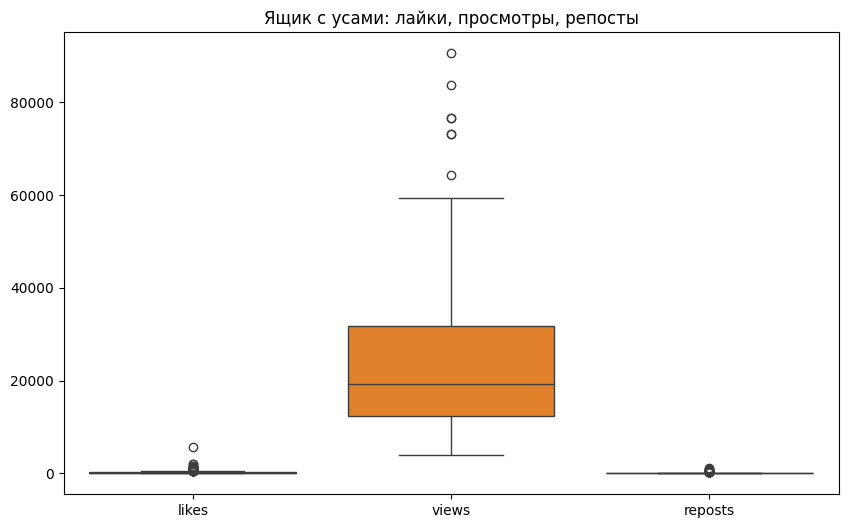

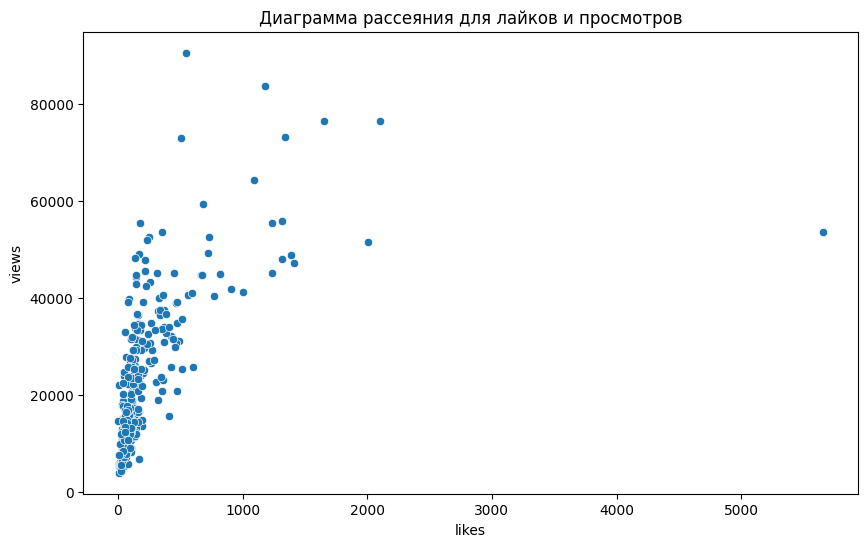

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['likes', 'views', 'reposts']])
plt.title("Ящик с усами: лайки, просмотры, репосты")
plt.show()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='likes', y='views', data=df)
plt.title('Диаграмма рассеяния для лайков и просмотров')
plt.show()


## А вот с выбросами ситуация грустнее. Я решила вывести не только ящик с усами, но и диаграмму рассеяния, поскольку на ней отображены единичные выбросы, которые возникают, когда количество лайков относительно просмотров сильно выбивается из общего паттерна распределения.

### На ящике с усами отчетливо видно, что выбросы существуют по пункту "просмотры" - некоторые посты набрали аномальное большое количество просмотров по сравнению с остальными. В лайках и репостах разброс значений маленький, что в целом логично - даже если пост попал в рекомендованные, количество лайков и репостов все равно не будет радикально отличаться. Однако, выбросы там тоже присуствуют, пусть и не такие значимые, как в случае с просмотрами.
### На диаграмме рассеяния тоже видны выбросы, однако самый "радикальный" находится правее всех - при относительно небольшом количестве просмотров пост набрал более 5 тысяч лайков, судя по графику.

# Сделаем препроцессинг текстовых данных. | 2 балла

In [ ]:
# на ИАДе рассказывали, как токенизировать с помощью Твиттер-токенизатора, тут я пользуюсь им

from string import punctuation
from nltk.tokenize import TweetTokenizer
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pymorphy2
import pandas as pd

tokens = {}
tw = TweetTokenizer()
morph = pymorphy2.MorphAnalyzer()
textt= df['text'].apply(lambda x: x.lower())
for text in textt:
    textt=re.sub('[^a-zа-я]+', ' ', text) #заранее фильтрую, чтобы отстутствовали знаки, так как модуль пунктации видит не все
    #  (например, игнорирует кавычки-елочки и длинные тире при удалении)
    tok = tw.tokenize(textt)

    for t in tok:
        t=morph.parse(t)[0].normal_form #сделала лемматизацию, чтобы в конечной выдаче были только начальные формы слова
        if ('https://' not in t) and (t not in stopwords.words('russian')) and (t not in punctuation):
            if t in tokens:
                tokens[t] += 1
            else:
                tokens[t] = 1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Итак, что я сделала на этапе препроцессинга:
1. Привела к нижнему регистру
2. Убрала все знаки препинания
3. Токенизировала
4. Сделала лемматизацию
5. Убрала ссылки, если таковые были
6. Убрала стопслова

In [ ]:
print(sorted(tokens.items(), key=lambda x: x[1], reverse=True))

[('это', 306), ('который', 239), ('год', 158), ('свой', 122), ('всё', 120), ('новый', 110), ('компания', 91), ('весь', 83), ('первый', 78), ('пользователь', 76), ('мочь', 68), ('россия', 61), ('соцсеть', 55), ('ещё', 54), ('просто', 51), ('время', 51), ('стать', 50), ('сервис', 48), ('telegram', 47), ('также', 46), ('приложение', 45), ('бренд', 41), ('яндекс', 41), ('реклама', 40), ('самый', 40), ('очень', 39), ('человек', 39), ('платформа', 37), ('контент', 34), ('сделать', 34), ('появиться', 34), ('работать', 33), ('слово', 33), ('говорить', 32), ('подписка', 32), ('число', 32), ('большой', 31), ('рекламный', 31), ('день', 31), ('делать', 31), ('бизнес', 30), ('российский', 30), ('канал', 30), ('каждый', 30), ('аудитория', 30), ('смочь', 29), ('дуров', 29), ('страна', 29), ('возможность', 29), ('хотеть', 29), ('проект', 28), ('именно', 28), ('банк', 28), ('рынок', 28), ('либо', 28), ('момент', 27), ('логотип', 27), ('видео', 27), ('пока', 26), ('последний', 26), ('почему', 26), ('app

# Посмотрим на самые часто встречающиеся слова. Хотим ли мы добавить что-то в список стоп-слов? | 2 балла

### мне не понравилось, что в стоп-словаре для русского языка нет некоторых очевидно мусорных по смыслу слов, если мы не анализируем их в словосочетаниях. Именно их я и исключила в своем кастомном словаре.

In [ ]:
russian=set(stopwords.words('russian'))
custom={'это', 'который', 'свой', 'всё', 'весь','ещё','просто','также','самый','очень',
        'каждый','именно','либо','почему','наш','вообще','ия','ваш','млн'}
stop=russian.union(custom)

# Какие самые часто встречающиеся слова у ТОП-100 постов по кол-ву лайков? | 1 балл

In [ ]:
sto=df.nlargest(100, 'likes')
tokens = {}
tw = TweetTokenizer()
morph = pymorphy2.MorphAnalyzer()
textt= sto['text'].apply(lambda x: x.lower())
for text in textt:
    textt=re.sub('[^a-zа-я]+', ' ', text)
    tok = tw.tokenize(textt)
    for t in tok:
        t=morph.parse(t)[0].normal_form
        if ('https://' not in t) and (t not in stop) and (t not in punctuation):
            if t in tokens:
                tokens[t] += 1
            else:
                tokens[t] = 1

In [ ]:
print(sorted(tokens.items(), key=lambda x: x[1], reverse=True)[:50])

[('год', 47), ('первый', 23), ('новый', 21), ('мочь', 20), ('telegram', 20), ('дуров', 19), ('россия', 17), ('говорить', 16), ('компания', 16), ('пользователь', 16), ('слово', 15), ('человек', 15), ('соцсеть', 15), ('мессенджер', 14), ('павел', 14), ('сделать', 13), ('момент', 13), ('рекламный', 12), ('конец', 12), ('хотеть', 12), ('банк', 12), ('время', 12), ('реклама', 12), ('главное', 12), ('пост', 12), ('комментарий', 12), ('канал', 12), ('страна', 11), ('работать', 10), ('делать', 10), ('должный', 10), ('близкий', 10), ('пытаться', 10), ('стать', 10), ('сеть', 10), ('число', 9), ('ребята', 9), ('важный', 9), ('сегодня', 9), ('интервью', 9), ('пока', 8), ('видео', 8), ('бренд', 8), ('писать', 8), ('вопрос', 8), ('появиться', 8), ('сразу', 8), ('начало', 8), ('ребёнок', 8), ('большой', 8)]


Вывела самые частотные слова (50 штук) +количество их повторений  (для топ-100 постов по лайкам)

# Визуализируйте (с использованием wordcloud) и сравните самые часто встречающиеся слова для постов за январь-февраль и март-апрель. | 1 балл

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
winter=df[(df['date']>='2024-01-24')&(df['date']<='2024-02-30')] #отбираем посты за указанный зимний период (+ или - 1 день с каждого срока, чтобы точно не ошибиться с вхождением)
tokens = []
tw = TweetTokenizer()
morph = pymorphy2.MorphAnalyzer()
textt= winter['text'].apply(lambda x: x.lower())
for text in textt:
    textt=re.sub('[^a-zа-я]+', ' ', text)
    tok = tw.tokenize(textt)
    for t in tok:
        t=morph.parse(t)[0].normal_form
        if ('https://' not in t) and (t not in stop) and (t not in punctuation):
          tokens.append(t)



In [ ]:
winter

,date,text,likes,views,reposts
232,2024-02-29 11:39:09,Помните юбку из полотенца от Balenciaga за 852...,22,5527,13
233,2024-02-29 07:31:00,В рамках совместного сотрудничества WhatsApp и...,47,7268,15
234,2024-02-28 17:55:17,Спустя несколько часов после радостной новости...,161,34640,60
235,2024-02-28 12:21:53,"⚡️Павел Дуров сообщил, что уже с марта владель...",407,34064,199
236,2024-02-28 10:34:41,⚡️Госдума в третьем чтении приняла законопроек...,140,31637,81
...,...,...,...,...,...
290,2024-01-26 20:27:55,#Антон СЕО Epic Тим Суини раскритиковал новый ...,28,12069,5
291,2024-01-25 21:04:43,"На прошлой неделе внес предоплату за тур, в ко...",159,17102,26
292,2024-01-25 18:55:48,⚡️Apple позволила скачивать на iPhone приложен...,117,32053,88
293,2024-01-25 12:29:31,Авито запустил возможность покупки товаров на ...,56,12486,22


### все в порядке, даты нужные

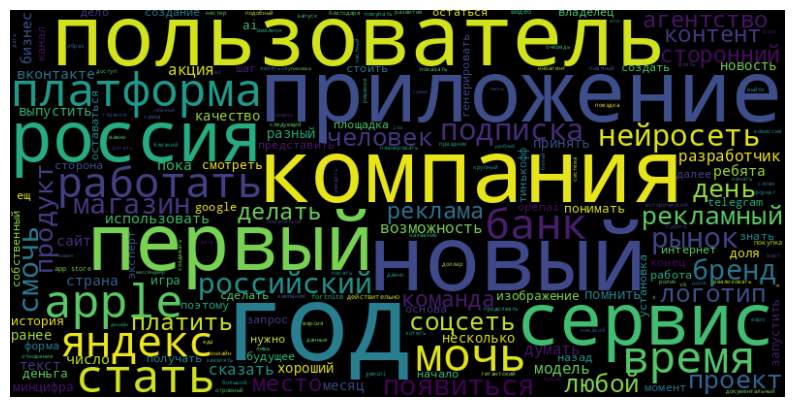

In [ ]:
tokens=' '.join(tokens)
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(tokens)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
spring=df[(df['date']>='2024-03-01')&(df['date']<='2024-04-31')]
tokens = []
tw = TweetTokenizer()
morph = pymorphy2.MorphAnalyzer()
textt= spring['text'].apply(lambda x: x.lower())
for text in textt:
    textt=re.sub('[^a-zа-я]+', ' ', text)
    tok = tw.tokenize(textt)
    for t in tok:
        t=morph.parse(t)[0].normal_form
        if ('https://' not in t) and (t not in stop) and (t not in punctuation):
          tokens.append(t)

In [ ]:
spring

,date,text,likes,views,reposts
43,2024-04-30 17:38:00,Россия: предупреждает Telegram о необходимости...,473,34965,96
44,2024-04-30 15:18:30,"Насть, все в порядке?",140,33758,36
45,2024-04-30 10:39:48,"Довольно сильная социальная реклама, которая п...",53,10636,3
46,2024-04-29 13:56:48,Илон Маск уволил весь отдел маркетинга Tesla в...,170,22636,52
47,2024-04-29 11:58:02,#нестер Как Тикток врал и следы подтирал\n\nОс...,116,17492,33
...,...,...,...,...,...
227,2024-03-01 20:38:00,Skillbox намерен провести IPO. Если это произо...,158,20823,39
228,2024-03-01 15:39:04,#Антон YouTube начал раскатывать новый интерфе...,21,9863,15
229,2024-03-01 14:31:22,Wildberries запустил экспресс-доставку цветов:...,51,13177,38
230,2024-03-01 11:11:00,Ежемесячная аудитория RUTUBE за 2023 год вырос...,118,22236,24


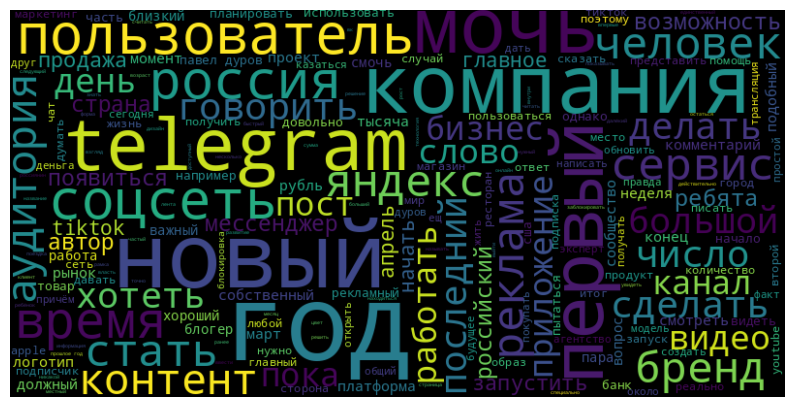

In [ ]:
tokens=' '.join(tokens)
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(tokens)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Самые частые слова отличаются не сильно. Однако, в марте месяце, например, в облаке слов появляется слово "телеграм", что, вероятно, связано с активной деятельностью компании по нововведениям в апреле и марте. В целом, слова в обоих облаках слов так или иначе связаны с цифровыми сервисами - слова "приложение", "пользователь", "сервис", а также с рекламной деятельностью, что напрямую отвечает позиционированию паблика.